# Electricity Price Forecasting on the German day-ahead market

This notebook is the main interface to the associated EPF library. Various parameters can be adjusted within the library via the Config file. A more detailed description of the individual parameters can be found within the configuration classes. In the “exploratory_analysis” notebook, the raw data sets are analyzed exploratively and the results are displayed visually. Based on these results, features from the data sets were specifically selected for further use in the deep learning pipeline.

The forecasting pipeline is built to automatically perform data preprocessing including data cleaning, outlier removal and seasonal decomposition. Within the configuration feature engineering can be toggled on and of for each feature. Forecasting is done with two different models, that can be retrained and saved anytime. The models available are an LSTM and GRU. They all perform multi-step ahead, single shot forecasts. This means by default each forecast contains 24 time steps into the future, that are forecasted together in one computation.

In [1]:
from epf.pipeline import EpfPipeline

pipeline = EpfPipeline()

2025-05-11 21:42:39.145 | INFO     | epf.config:<module>:19 - PROJ_ROOT path is: C:\Users\valen\PycharmProjects\epf
2025-05-11 21:42:39.145 | INFO     | epf.config:create_dir:15 - DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data
2025-05-11 21:42:39.145 | INFO     | epf.config:create_dir:15 - RAW_DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data/raw
2025-05-11 21:42:39.145 | INFO     | epf.config:create_dir:15 - INTERIM_DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data/interim
2025-05-11 21:42:39.145 | INFO     | epf.config:create_dir:15 - PROCESSED_DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data/processed
2025-05-11 21:42:39.145 | INFO     | epf.config:create_dir:15 - TRAIN_DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data/processed/train_data
2025-05-11 21:42:39.145 | INFO     | epf.config:create_dir:15 - MODELS_DIR path is: C:/Users/valen/PycharmProjects/epf/models
2025-05-11 21:42:39.145 | INFO     | epf.config:create_dir:15 - PREDICTIONS_D

Pipeline initialized with:
FeatureConfig: 
Selected features: 
['DE-LU Prices', 'DE Solar Generation', 'DE Wind Generation Offshore', 'DE Wind Generation Onshore', 'DE Load', 'FR Load', 'Month', 'Day of Week', 'Holiday']
WINDOW_LENGTH: 24
N_SIGMA: 3
METHOD: nearest

ModelConfig: 
TRAIN_SPLIT: 2023-09-30 22:00:00+00:00
VALIDATION_SPLIT: 2023-12-31 22:00:00+00:00
MAX_EPOCHS: 20
OUT_STEPS: 24
SEASONALITY_PERIOD: 24
INPUT_WIDTH_FACTOR: 1.25
MODEL_BUILDER: LSTM
USE_HIDDEN_LAYERS: True
NUM_FEATURES: 9
UNIT_MIN_VALUE: 32
UNIT_MAX_VALUE: 128
UNIT_STEP: 32
LR_MIN_VALUE: 0.001
LR_MAX_VALUE: 0.1
LR_STEP: 0.001
DROPOUT_RATE_MIN_VALUE: 0.2
DROPOUT_RATE_MAX_VALUE: 0.7
DROPOUT_RATE_STEP: 0.1
NUM_LAYERS_MIN: 1
NUM_LAYERS_MAX: 3
NUM_LAYERS_STEP: 1
MAX_TRIALS: 50
LABEL_COL: de_prices_hat_rm_seasonal




In [2]:
model_name = 'lstm_vre_neighboring_load'

pipeline.train(model_name, overwrite=True, prep_data=True, use_tuned_hyperparams=False)
pipeline.evaluate(model_name)

Trial 50 Complete [00h 00m 14s]
mean_absolute_error: 0.3363642990589142

Best mean_absolute_error So Far: 0.30100178718566895
Total elapsed time: 00h 20m 46s


C:\Users\valen\.virtualenvs\bachelor_arbeit\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
2025-05-11 22:06:38.885 | INFO     | epf.pipeline:_tune_hyperparameters:317 - Hyperparameter tuning took 00h:20m:47s.
2025-05-11 22:06:38.885 | SUCCESS  | epf.pipeline:train:424 - Successfully tuned hyperparameters for lstm_vre_neighboring_load
2025-05-11 22:06:38.887 | INFO     | epf.pipeline:train:431 - Training lstm_vre_neighboring_load on the following Features:['DE-LU Prices', 'DE Solar Generation', 'DE Wind Generation Offshore', 'DE Wind Generation Onshore', 'DE Load', 'FR Load', 'Month', 'Day of Week', 'Holiday'].


Epoch 1/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.2801 - mean_absolute_error: 0.2801 - mean_absolute_percentage_error: 228.3503 - root_mean_squared_error: 0.3942 - val_loss: 0.7878 - val_mean_absolute_error: 0.7878 - val_mean_absolute_percentage_error: 408.0981 - val_root_mean_squared_error: 1.0056
Epoch 2/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.2673 - mean_absolute_error: 0.2673 - mean_absolute_percentage_error: 225.5795 - root_mean_squared_error: 0.3711 - val_loss: 0.7948 - val_mean_absolute_error: 0.7948 - val_mean_absolute_percentage_error: 367.6476 - val_root_mean_squared_error: 1.0179
Epoch 3/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.2536 - mean_absolute_error: 0.2536 - mean_absolute_percentage_error: 227.0917 - root_mean_squared_error: 0.3524 - val_loss: 0.7941 - val_mean_absolute_error: 0.7941 - val_mean_absolute_percentage_error: 387.4119 - val_root_mean_squared_error: 1.0182


2025-05-11 22:06:50.406 | SUCCESS  | epf.pipeline:train:437 - Successfully trained lstm_vre_neighboring_load. Now saving...
2025-05-11 22:06:50.406 | INFO     | epf.pipeline:train:442 - Training took 00h:24m:02s.
2025-05-11 22:06:50.453 | SUCCESS  | epf.pipeline:train:466 - Successfully saved lstm_vre_neighboring_load to C:/Users/valen/PycharmProjects/epf/models/lstm_vre_neighboring_load.pkl
2025-05-11 22:06:50.457 | INFO     | epf.pipeline:evaluate:478 - Loading trained model from C:\Users\valen\PycharmProjects\epf\models\lstm_vre_neighboring_load.pkl.


68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8104 - mean_absolute_error: 0.8104 - mean_absolute_percentage_error: 392.2878 - root_mean_squared_error: 1.0421


2025-05-11 22:06:53.889 | INFO     | epf.pipeline:evaluate:511 - Evaluation took 00h:00m:03s.


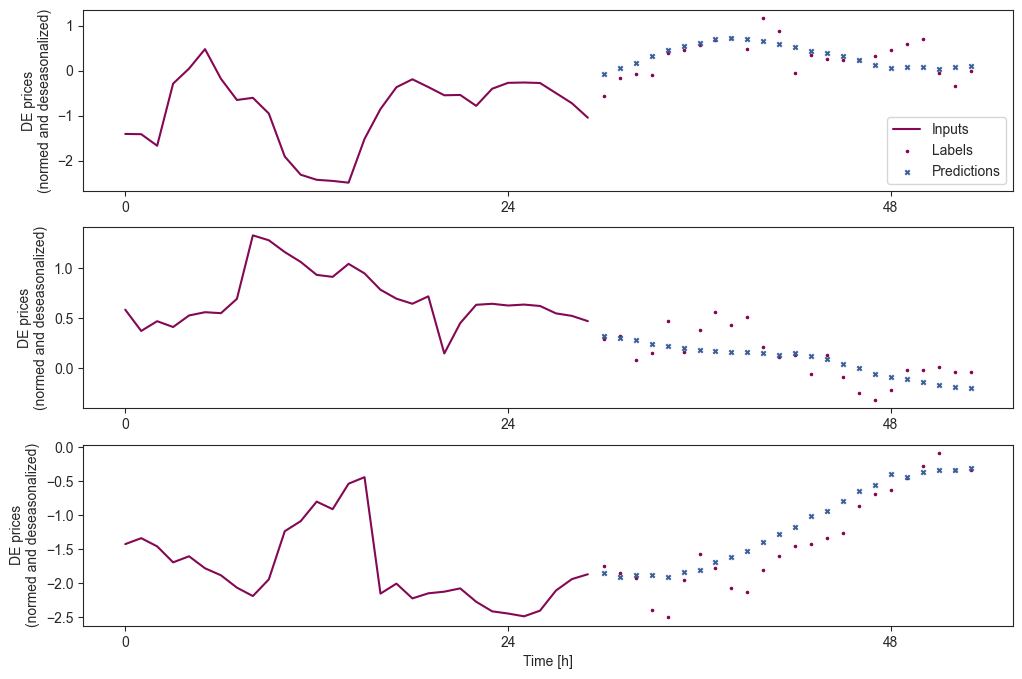

In [6]:
import pickle as pkl

with open("../models/lstm_all_features.pkl", "rb") as f:
    model_obj = pkl.load(f)

window = model_obj['window']
model = model_obj['best_model']
model_name = model_obj['model_name']
plot_col = 'de_prices_hat_rm_seasonal'

window.plot(model, plot_col=plot_col)

In [ ]:
test_df = model_obj['test_df'][plot_col]
train_mean = model_obj['train_mean'][plot_col]
train_std = model_obj['train_std'][plot_col]
seasonal_component = model_obj['seasonal']

In [ ]:
seasonal = seasonal_component.get(plot_col).seasonal.sum(axis=1)
seasonal.rename('seasonal', inplace=True)

In [ ]:
test_df.join(seasonal, how='left')

In [ ]:
original = pd.read_csv('../data/raw/de_prices_2024.csv', header=1, names=['timestamp', 'de_prices'])
original['timestamp'] = pd.to_datetime(original['timestamp'])
original.set_index('timestamp', inplace=True)
original

In [ ]:
prices_denormalized = test_df.sum(axis=1) * train_std + train_mean

plt.figure(figsize=(12, 4))
plt.plot(prices_denormalized)
plt.plot(original['de_prices'], alpha=0.5)